In [1]:
from Bio import SeqIO
import matplotlib.pyplot as plt

In [3]:
fastq_path = '../../assets/input/test-combined.fastq'  # Adjust the path if your file is in a different directory

read_lengths = []
read_qualities = []

for record in SeqIO.parse(fastq_path, 'fastq'):
    read_lengths.append(len(record.seq))
    read_qualities.append(record.letter_annotations["phred_quality"])

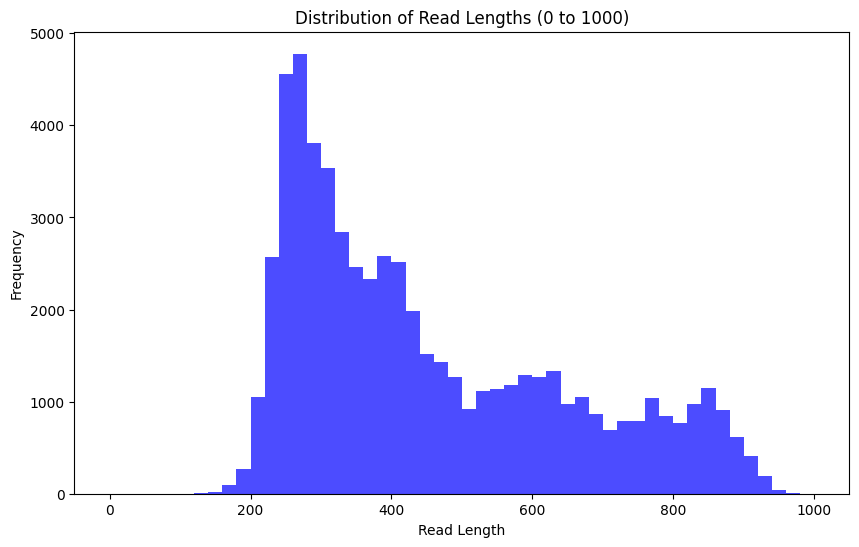

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(read_lengths, bins=50, range=(0, 1000), color='blue', alpha=0.7)  # Adjusted bin size and range
plt.title('Distribution of Read Lengths (0 to 1000)')
plt.xlabel('Read Length')
plt.ylabel('Frequency')
plt.show()

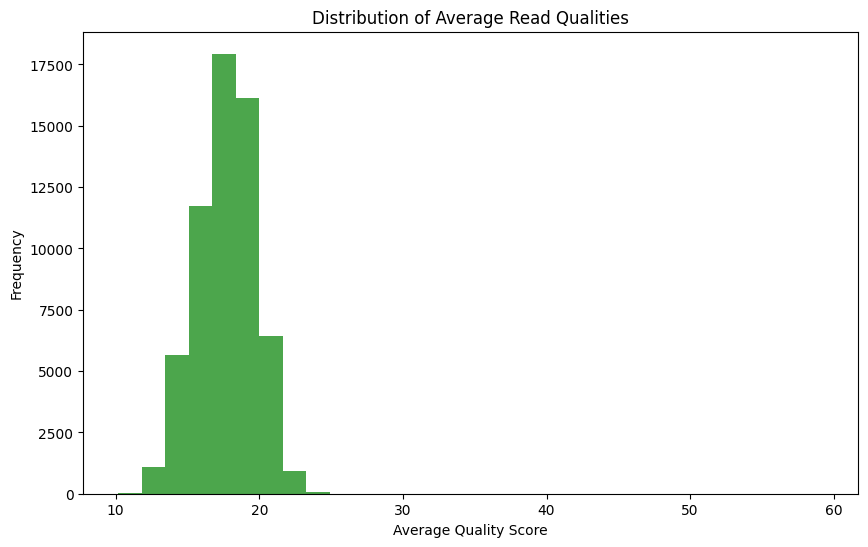

In [5]:
average_qualities = [sum(quals)/len(quals) for quals in read_qualities if len(quals) > 0]

plt.figure(figsize=(10, 6))
plt.hist(average_qualities, bins=30, color='green', alpha=0.7)
plt.title('Distribution of Average Read Qualities')
plt.xlabel('Average Quality Score')
plt.ylabel('Frequency')
plt.show()

In [6]:
import numpy as np

# Assuming read_lengths and average_qualities are already defined as per previous steps

# Calculate the required statistics
mean_read_length = np.mean(read_lengths)
min_read_length = np.min(read_lengths)
max_read_length = np.max(read_lengths)
num_reads = len(read_lengths)
std_dev_read_length = np.std(read_lengths)
average_read_quality = np.mean(average_qualities)

# Store in a dictionary
filename = 'test.fastq'  # Replace with your actual filename
stats_map = {
    filename: {
        'mean_read_length': mean_read_length,
        'min_read_length': min_read_length,
        'max_read_length': max_read_length,
        'number_of_reads': num_reads,
        'std_dev_read_length': std_dev_read_length,
        'average_read_quality': average_read_quality
    }
}

# To access the stored information, use:
stats_map[filename]

{'mean_read_length': 453.38873333333333,
 'min_read_length': 125,
 'max_read_length': 5044,
 'number_of_reads': 60000,
 'std_dev_read_length': 199.88657346871057,
 'average_read_quality': 17.70668201940736}

In [1]:
from Bio import SeqIO
import numpy as np

def process_fastq_in_blocks_and_store_stats(fastq_path, block_size=250):
    block_number = 0
    stats_map = {}
    current_block_reads = []
    current_block_qualities = []

    with open(fastq_path, 'r') as fastq_file:
        for record in SeqIO.parse(fastq_file, 'fastq'):
            current_block_reads.append(len(record.seq))
            current_block_qualities.extend(record.letter_annotations["phred_quality"])

            if len(current_block_reads) == block_size:
                # Calculate statistics for the current block
                mean_read_length = np.mean(current_block_reads)
                min_read_length = np.min(current_block_reads)
                max_read_length = np.max(current_block_reads)
                std_dev_read_length = np.std(current_block_reads)
                average_read_quality = np.mean(current_block_qualities)

                # Store in the dictionary
                block_key = f"{fastq_path}_block_{block_number}"
                stats_map[block_key] = {
                    'mean_read_length': mean_read_length,
                    'min_read_length': min_read_length,
                    'max_read_length': max_read_length,
                    'number_of_reads': block_size,
                    'std_dev_read_length': std_dev_read_length,
                    'average_read_quality': average_read_quality
                }

                # Reset for the next block
                current_block_reads = []
                current_block_qualities = []
                block_number += 1

        # Handle the last block if it's not empty and less than block_size
        if current_block_reads:
            mean_read_length = np.mean(current_block_reads)
            min_read_length = np.min(current_block_reads)
            max_read_length = np.max(current_block_reads)
            std_dev_read_length = np.std(current_block_reads)
            average_read_quality = np.mean(current_block_qualities)

            block_key = f"{fastq_path}_block_{block_number}"
            stats_map[block_key] = {
                'mean_read_length': mean_read_length,
                'min_read_length': min_read_length,
                'max_read_length': max_read_length,
                'number_of_reads': len(current_block_reads),
                'std_dev_read_length': std_dev_read_length,
                'average_read_quality': average_read_quality
            }

    return stats_map

# Example usage
fastq_path = '../../assets/input/test-combined.fastq'  # Adjust the path if your file is in a different directory
stats_map = process_fastq_in_blocks_and_store_stats(fastq_path)

In [2]:
stats_map

{'../../assets/input/test-combined.fastq_block_0': {'mean_read_length': 463.484,
  'min_read_length': 200,
  'max_read_length': 934,
  'number_of_reads': 250,
  'std_dev_read_length': 199.24066287783728,
  'average_read_quality': 17.86327036100491},
 '../../assets/input/test-combined.fastq_block_1': {'mean_read_length': 478.356,
  'min_read_length': 170,
  'max_read_length': 926,
  'number_of_reads': 250,
  'std_dev_read_length': 198.69914258496436,
  'average_read_quality': 18.160666950973752},
 '../../assets/input/test-combined.fastq_block_2': {'mean_read_length': 441.528,
  'min_read_length': 203,
  'max_read_length': 920,
  'number_of_reads': 250,
  'std_dev_read_length': 199.92188778620516,
  'average_read_quality': 17.79546484028193},
 '../../assets/input/test-combined.fastq_block_3': {'mean_read_length': 443.544,
  'min_read_length': 172,
  'max_read_length': 914,
  'number_of_reads': 250,
  'std_dev_read_length': 196.6627165072221,
  'average_read_quality': 18.200927078260555},

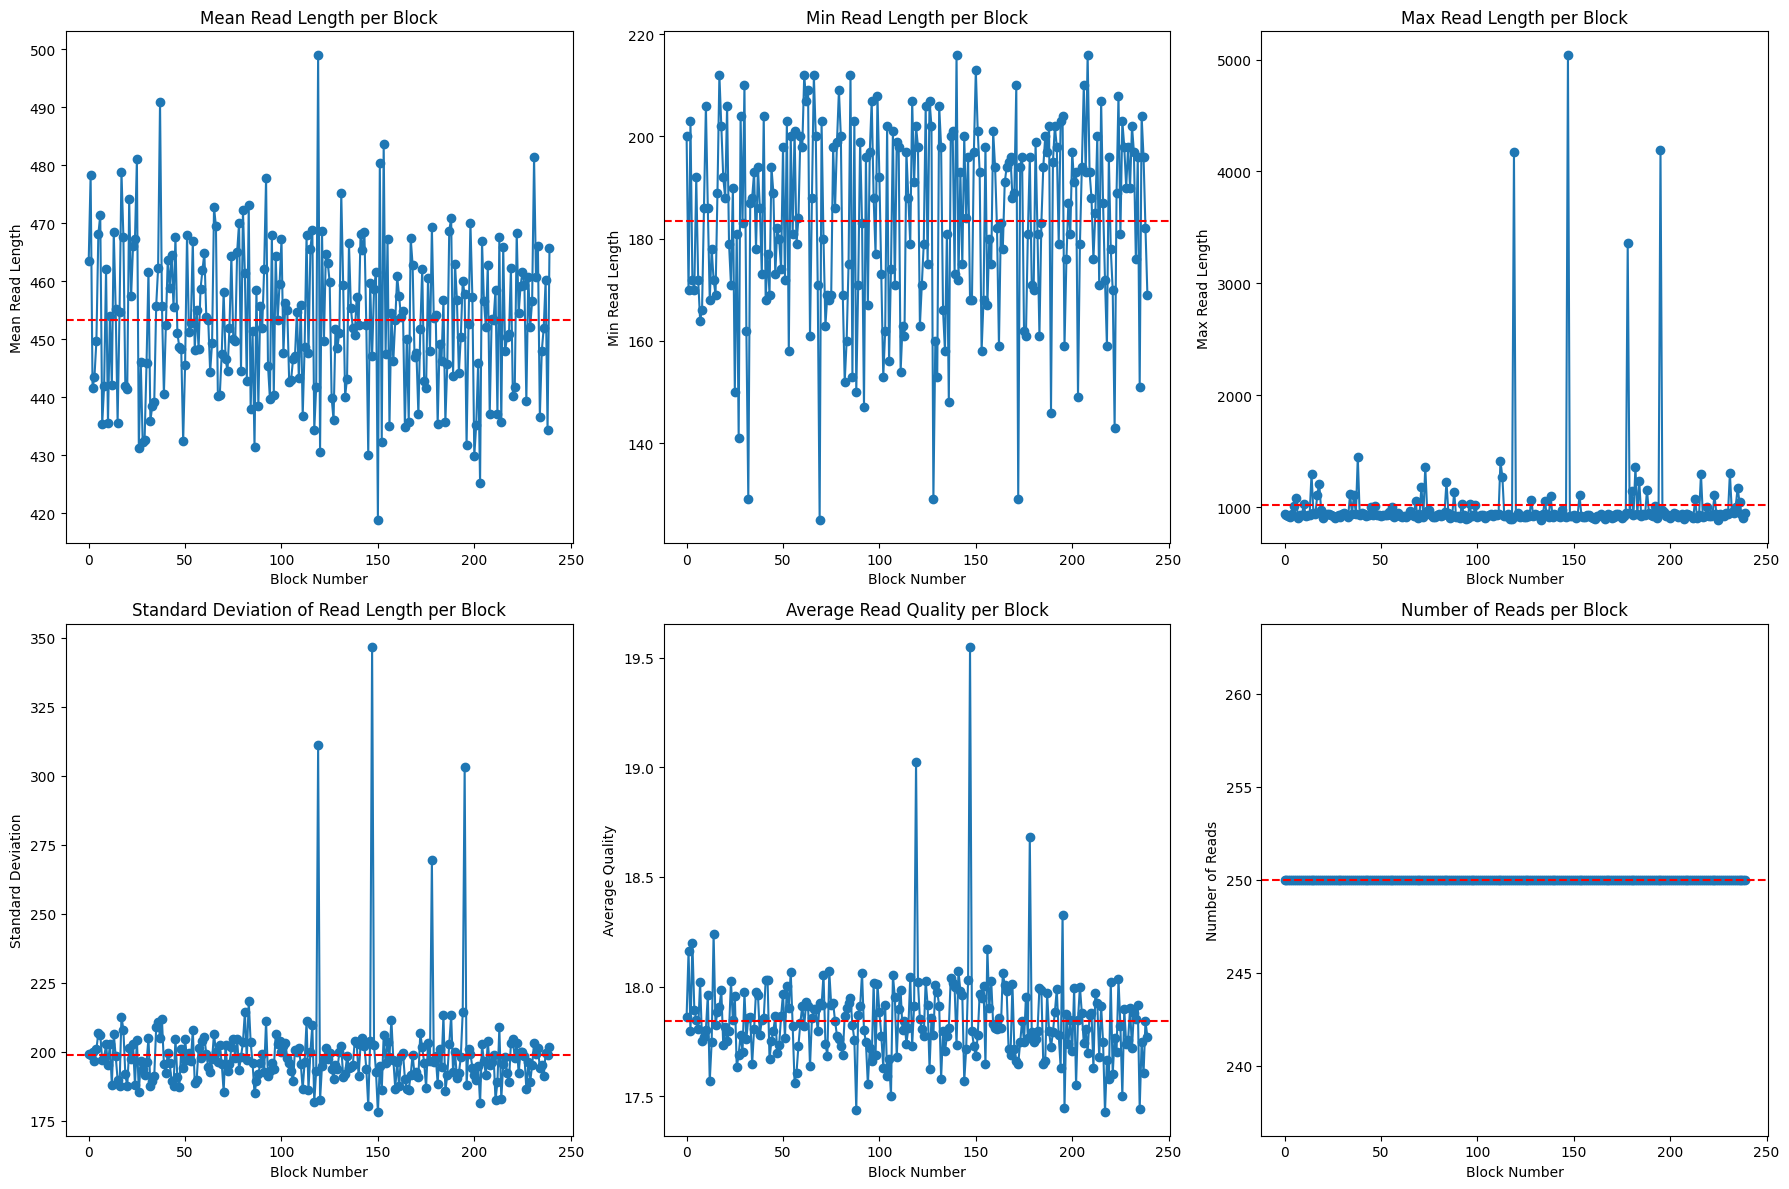

In [3]:
import matplotlib.pyplot as plt

# Extract data for plotting
mean_lengths = [stats_map[key]['mean_read_length'] for key in stats_map]
min_lengths = [stats_map[key]['min_read_length'] for key in stats_map]
max_lengths = [stats_map[key]['max_read_length'] for key in stats_map]
std_devs = [stats_map[key]['std_dev_read_length'] for key in stats_map]
avg_qualities = [stats_map[key]['average_read_quality'] for key in stats_map]
num_reads = [stats_map[key]['number_of_reads'] for key in stats_map]
blocks = range(len(stats_map))

# Calculating overall averages
overall_avg_mean_length = sum(mean_lengths) / len(mean_lengths)
overall_avg_min_length = sum(min_lengths) / len(min_lengths)
overall_avg_max_length = sum(max_lengths) / len(max_lengths)
overall_avg_std_dev = sum(std_devs) / len(std_devs)
overall_avg_quality = sum(avg_qualities) / len(avg_qualities)
overall_avg_num_reads = sum(num_reads) / len(num_reads)

# Plotting with average lines
plt.figure(figsize=(18, 12))

# Mean Read Length
plt.subplot(2, 3, 1)
plt.plot(blocks, mean_lengths, marker='o')
plt.axhline(y=overall_avg_mean_length, color='r', linestyle='--')
plt.title('Mean Read Length per Block')
plt.xlabel('Block Number')
plt.ylabel('Mean Read Length')

# Min Read Length
plt.subplot(2, 3, 2)
plt.plot(blocks, min_lengths, marker='o')
plt.axhline(y=overall_avg_min_length, color='r', linestyle='--')
plt.title('Min Read Length per Block')
plt.xlabel('Block Number')
plt.ylabel('Min Read Length')

# Max Read Length
plt.subplot(2, 3, 3)
plt.plot(blocks, max_lengths, marker='o')
plt.axhline(y=overall_avg_max_length, color='r', linestyle='--')
plt.title('Max Read Length per Block')
plt.xlabel('Block Number')
plt.ylabel('Max Read Length')

# Standard Deviation of Read Length
plt.subplot(2, 3, 4)
plt.plot(blocks, std_devs, marker='o')
plt.axhline(y=overall_avg_std_dev, color='r', linestyle='--')
plt.title('Standard Deviation of Read Length per Block')
plt.xlabel('Block Number')
plt.ylabel('Standard Deviation')

# Average Quality
plt.subplot(2, 3, 5)
plt.plot(blocks, avg_qualities, marker='o')

plt.axhline(y=overall_avg_quality, color='r', linestyle='--')
plt.title('Average Read Quality per Block')
plt.xlabel('Block Number')
plt.ylabel('Average Quality')

# Number of Reads
plt.subplot(2, 3, 6)
plt.plot(blocks, num_reads, marker='o')
plt.axhline(y=overall_avg_num_reads, color='r', linestyle='--')
plt.title('Number of Reads per Block')
plt.xlabel('Block Number')
plt.ylabel('Number of Reads')

plt.tight_layout()
plt.show()

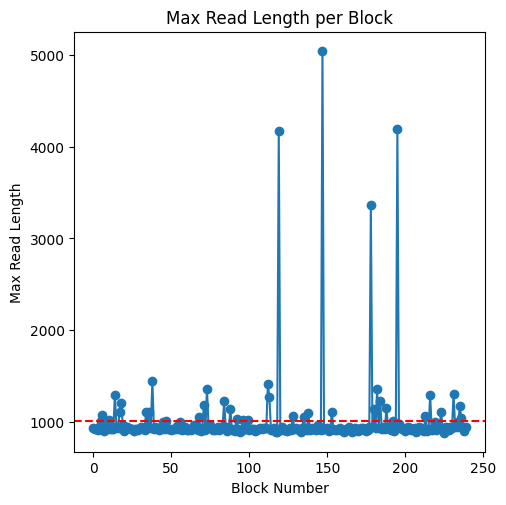

In [4]:
import matplotlib.pyplot as plt

# Extract data for plotting
mean_lengths = [stats_map[key]['mean_read_length'] for key in stats_map]
min_lengths = [stats_map[key]['min_read_length'] for key in stats_map]
max_lengths = [stats_map[key]['max_read_length'] for key in stats_map]
std_devs = [stats_map[key]['std_dev_read_length'] for key in stats_map]
avg_qualities = [stats_map[key]['average_read_quality'] for key in stats_map]
num_reads = [stats_map[key]['number_of_reads'] for key in stats_map]
blocks = range(len(stats_map))

# Calculating overall averages
overall_avg_mean_length = sum(mean_lengths) / len(mean_lengths)
overall_avg_min_length = sum(min_lengths) / len(min_lengths)
overall_avg_max_length = sum(max_lengths) / len(max_lengths)
overall_avg_std_dev = sum(std_devs) / len(std_devs)
overall_avg_quality = sum(avg_qualities) / len(avg_qualities)
overall_avg_num_reads = sum(num_reads) / len(num_reads)

# Plotting with average lines
plt.figure(figsize=(18, 12))

# Max Read Length
plt.subplot(2, 3, 3)
plt.plot(blocks, max_lengths, marker='o')
plt.axhline(y=overall_avg_max_length, color='r', linestyle='--')
plt.title('Max Read Length per Block')
plt.xlabel('Block Number')
plt.ylabel('Max Read Length')

plt.show()

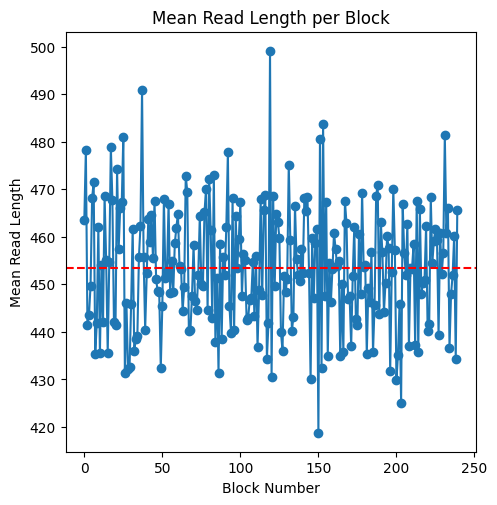

In [5]:
import matplotlib.pyplot as plt

# Extract data for plotting
mean_lengths = [stats_map[key]['mean_read_length'] for key in stats_map]
min_lengths = [stats_map[key]['min_read_length'] for key in stats_map]
max_lengths = [stats_map[key]['max_read_length'] for key in stats_map]
std_devs = [stats_map[key]['std_dev_read_length'] for key in stats_map]
avg_qualities = [stats_map[key]['average_read_quality'] for key in stats_map]
num_reads = [stats_map[key]['number_of_reads'] for key in stats_map]
blocks = range(len(stats_map))

# Calculating overall averages
overall_avg_mean_length = sum(mean_lengths) / len(mean_lengths)
overall_avg_min_length = sum(min_lengths) / len(min_lengths)
overall_avg_max_length = sum(max_lengths) / len(max_lengths)
overall_avg_std_dev = sum(std_devs) / len(std_devs)
overall_avg_quality = sum(avg_qualities) / len(avg_qualities)
overall_avg_num_reads = sum(num_reads) / len(num_reads)

# Plotting with average lines
plt.figure(figsize=(18, 12))

# Mean Read Length
plt.subplot(2, 3, 1)
plt.plot(blocks, mean_lengths, marker='o')
plt.axhline(y=overall_avg_mean_length, color='r', linestyle='--')
plt.title('Mean Read Length per Block')
plt.xlabel('Block Number')
plt.ylabel('Mean Read Length')

plt.show()